# Cognitive modeling week5


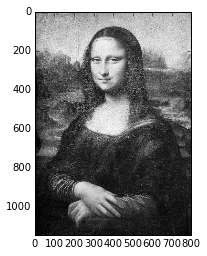

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image

plt.rcParams['figure.figsize'] = (20.0, 20.0)
%matplotlib inline

fname = 'MonaLisaBW.jpg'
image = Image.open(fname).convert("L")
I = np.asarray(image)
plt.imshow(I, cmap = cm.Greys_r)
plt.show()

In [5]:
patches = []
for i in np.arange(0,I.shape[0]-10, 10):
    for j in np.arange(0,I.shape[1]-10, 10): 
        A = I[ i:i+10 , j:j+10]
        patches.append(A)
        
print len(patches)
for l in patches:
    if l.shape != (10, 10):
        print l.shape




9006


In [6]:
vector_patches = []
for p in patches:
    vector_patches.append( p.reshape(1,100) )

In [7]:
print len(vector_patches)
print vector_patches[10].shape
print vector_patches[10]

9006
(1L, 100L)
[[115 142 113 129 124  83 163 118 147  78 131 118 130 142 111  77 140 154
  151 126 169 123 107  83 140 102 111 142 105 141 142 134 130 146 120 133
  147 155 112 143 133 148 125 124 129 118  99  85 147 180  96 111 124 110
  101 131 131  58  87 108 124 111 150 144 110 142 155 109  97 134 136 148
  168 138 125 126 127 134 108 185 164 120 152 115 122 136 135 134  92 132
  131 136 133 113 155 140 109 134 124 129]]


In [8]:
S = np.zeros( (len(vector_patches), 100) )
for i in range(0,len(vector_patches)):
    S[i , : ] = vector_patches[i]
    
print S
print S.shape

[[  86.  100.   99. ...,  143.   89.  123.]
 [  78.  103.   96. ...,  110.  125.  127.]
 [  95.   95.  114. ...,  141.  130.  117.]
 ..., 
 [   7.    9.   11. ...,   13.    7.    8.]
 [   3.    4.    7. ...,    8.    9.    8.]
 [   6.    5.    6. ...,   14.   15.   16.]]
(9006L, 100L)


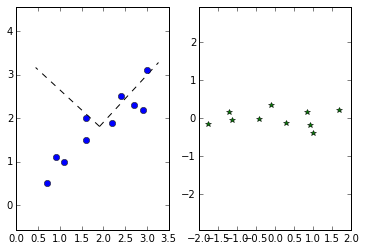

In [9]:
import princomp

#print examples: bellow

In [10]:
X, W, latent = princomp.princomp(S)

In [11]:
print X.shape
print W.T.shape


(100L, 100L)
(9006L, 100L)


(9006L, 100L)
range_j 79
range_i 114
-
(10L, 790L)
 add all rows:
I shape
(1143L, 800L)
I' shape
(1130L, 790L)


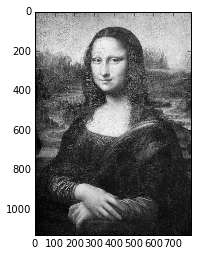

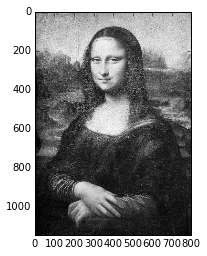

In [33]:
S_prime =  (np.matrix(X) * np.matrix(W )).T

patches_inverse = []

print S_prime.shape

for i in range(0,S_prime.shape[0]):
    patches_inverse.append( S_prime[i,:].reshape(10,10) )
    
range_j = I.shape[1]/ 10 -1
range_i = I.shape[0]/10

print "range_j %s" %range_j
print "range_i %s" %range_i

I_prime = patches_inverse[0]
for j in range(1, range_j):
        I_prime = np.concatenate( (I_prime , patches_inverse[j] ), axis = 1)

print "-"
print I_prime.shape
print " add all rows:"
for i in np.arange( range_j, len(patches_inverse) - range_j , range_j):
    Line = patches_inverse[i]
    for j in range(i+1,i + range_j):
        Line = np.concatenate( (Line , patches_inverse[j]) , axis = 1)
#     print " i' shape %s" % str(I_prime.shape)
#     print " line shape %s" % str(Line.shape)
    I_prime = np.concatenate(( I_prime , Line) , axis = 0 )
        
print "I shape"  
print I.shape
print "I' shape"
print I_prime.shape

plt.imshow( I_prime,  cmap = cm.Greys_r)
plt.show()

plt.imshow(I, cmap = cm.Greys_r)
plt.show()

[array([ 0.09912375,  0.0990204 ,  0.09927552,  0.09973291,  0.09970891,
         0.09985205,  0.0998988 ,  0.0992573 ,  0.09898529,  0.09864258,
         0.09955878,  0.09959522,  0.09948571,  0.1000036 ,  0.10065505,
         0.10029386,  0.10003958,  0.10000457,  0.09968134,  0.09902017,
         0.10016376,  0.09986155,  0.1000049 ,  0.10056284,  0.10046073,
         0.10057404,  0.10040564,  0.10022666,  0.09985582,  0.09954891,
         0.1002787 ,  0.10010493,  0.10039012,  0.10076094,  0.1003255 ,
         0.10054162,  0.10013535,  0.10023872,  0.1000512 ,  0.09976639,
         0.10071681,  0.10027136,  0.10064756,  0.10088404,  0.10051564,
         0.10097651,  0.10021295,  0.09994864,  0.10016457,  0.10008637,
         0.09985508,  0.09964184,  0.10020175,  0.10067154,  0.10063719,
         0.10097498,  0.10075593,  0.10010639,  0.10006731,  0.09981593,
         0.09949926,  0.09969752,  0.10044651,  0.10044588,  0.10022092,
         0.10071907,  0.10087336,  0.10027195,  0.0

In [50]:
S_prime =  (np.matrix(X[ :6 , :]) * np.matrix(W ).T).T

patches_inverse = []

print S_prime.shape

for i in range(0,S_prime.shape[0]):
    patches_inverse.append( S_prime[i,:].reshape(10,10) )
    
range_j = I.shape[1]/ 10 -1
range_i = I.shape[0]/10

print "range_j %s" %range_j
print "range_i %s" %range_i

I_prime = patches_inverse[0]
for j in range(1, range_j):
        I_prime = np.concatenate( (I_prime , patches_inverse[j] ), axis = 1)

print "-"
print I_prime.shape
print " add all rows:"
for i in np.arange( range_j, len(patches_inverse) - range_j , range_j):
    Line = patches_inverse[i]
    for j in range(i+1,i + range_j):
        Line = np.concatenate( (Line , patches_inverse[j]) , axis = 1)
#     print " i' shape %s" % str(I_prime.shape)
#     print " line shape %s" % str(Line.shape)
    I_prime = np.concatenate(( I_prime , Line) , axis = 0 )
        
print "I shape"  
print I.shape
print "I' shape"
print I_prime.shape

plt.imshow( I_prime,  cmap = cm.Greys_r)
plt.show()

plt.imshow(I, cmap = cm.Greys_r)
plt.show()

ValueError: shapes (6,100) and (9006,100) not aligned: 100 (dim 1) != 9006 (dim 0)